In [82]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn.metrics import ConfusionMatrixDisplay

In [83]:
# Defining thresholds
AT = 40    # Accelerometer threshold
GT = 5    # Gyroscope threshold

In [84]:
def predict_fall(df):
    df.drop_duplicates(subset=["time"], keep='last', inplace=True)
    df.reset_index(drop=True, inplace=True)

    df['acc'] = np.sqrt(df['ax'] ** 2 + df['ay'] ** 2 + df['az'] ** 2)
    df['omega'] = np.sqrt(df['wx'] ** 2 + df['wy'] ** 2 + df['wz'] ** 2)

    res = df.loc[ (df['acc'] > AT) & (df['omega'] > GT) ]

    return res.shape[0] > 0


In [85]:
BASE_PATH = os.getcwd()

tp = fp = fn = tn = 0

falls_directory = os.path.join(BASE_PATH, 'dataset', 'caida')

for filename in os.listdir(falls_directory):
    f = os.path.join(falls_directory, filename)
    if os.path.isfile(f):
        df = pd.read_csv(f)
        prediction = predict_fall(df)
        print(f'[INFO] {f} predicted as {prediction}')
        if prediction == True:
            tp += 1
        else:
            fn += 1

safe_directory = os.path.join(BASE_PATH, 'dataset', 'sin_caida')

for filename in os.listdir(safe_directory):
    f = os.path.join(safe_directory, filename)
    if os.path.isfile(f):
        df = pd.read_csv(f)
        prediction = predict_fall(df)
        print(f'[INFO] {f} predicted as {prediction}')
        if prediction == False:
            tn += 1
        else:
            fp += 1

[INFO] c:\Users\lm555\Desktop\Sensores\dataset\caida\1.csv predicted as True
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\caida\2.csv predicted as False
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\caida\3.csv predicted as False
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\caida\4.csv predicted as True
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\caida\5.csv predicted as False
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\caida\6.csv predicted as True
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\caida\7.csv predicted as True
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\caida\8.csv predicted as True
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\sin_caida\1.csv predicted as False
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\sin_caida\2.csv predicted as False
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\sin_caida\3.csv predicted as False
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\sin_caida\4.csv predicted as False
[INFO] c:\Users\lm555\Desktop\Sensores\dataset\sin_ca

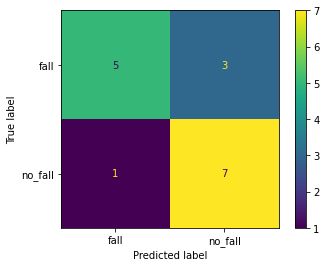

accuracy = 0.75
precision = 0.8333333333333334
recall = 0.625
f1 = 0.7142857142857143


In [91]:
cm = np.array(
    [
        [tp, fn],
        [fp, tn]
    ]
)

labels = ["fall", "no_fall"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=labels)
                               
disp.plot()
plt.show()

acc = (tp + tn) / (tp + fn + tn + fp)
pre = tp / (tp + fp)
rec = tp / (tp + fn)
f1 = (2 * pre * rec) / (pre + rec)

print(f'accuracy = {acc}')
print(f'precision = {pre}')
print(f'recall = {rec}')
print(f'f1 = {f1}')